**Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.**


Answer:

K-Means and Hierarchical Clustering are both popular methods for unsupervised learning and data clustering, but they differ in their approach, assumptions, and use cases.

**1. K-Means Clustering:**

**Approach:**

- **Centroid**: K-Means clustering works by partitioning the data into K distinct clusters, where K is a pre-defined number of clusters.

 - The algorithm works iteratively to assign data points to the nearest centroid and then recalculates the centroids based on the points assigned to them. This is repeated until convergence.

 **Steps**:

 1.Choose K initial centroids (randomly or using some method).

 2.Assign each data point to the nearest centroid.

 3.Update the centroids by calculating the mean of all points assigned to each centroid.

 4.Repeat steps 2 and 3 until the centroids no longer change significantly (convergence).


**2. Hierarchical Clustering:**
Hierarchical clustering builds a tree of clusters, known as a dendrogram, which represents a hierarchy of clusters. It can be agglomerative (bottom-up) or divisive (top-down).




**steps**:

1.Treat each data point as its own cluster.

2Find the two closest clusters and merge them into one.

3.Repeat steps 2 and 3 until all data points are merged into a single cluster.

**Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**

Answer:

The main goal of the Silhouette Score is to quantify how well each data point fits within its assigned cluster and how distinct its cluster is from other clusters.

**Cohesion**: How close the data point is to other points within the same cluster.

**Separation**: How far the data point is from points in the nearest neighboring cluster.


**Interpreting the Silhouette Score:**

**near +1**: The point is well-clustered. It is closer to other points within its own cluster and farther from points in other clusters.

 **near 0**: The point is on or near the boundary between two clusters.

 **near -1**: The point may be incorrectly assigned to the wrong cluster.





**Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?**

ans:

**DBSCAN :**DBSCAN is a powerful and widely used density based clustering algorithm.Unlike K-Means, which requires the number of clusters to be specified beforehand,DBSCAN identifies clusters based on the density of data points.This makes DBSCAN particularly effective in identifying arbitrarily shaped clusters and handling noise (outliers) in data.

**Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**

Answer:

Feature scaling is extremely important when applying clustering algorithms like K-Means and DBSCAN because both algorithms rely on distance-based measures (such as Euclidean distance) to group similar data points together. If the features are on different scales, the results of the clustering can be skewed, leading to incorrect or misleading clusters. Here's a breakdown of why feature scaling is essential for both algorithms.

**Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**

Answer:

**Elbow Method in K-Means Clustering:**

The Elbow Method helps determine the optimal number of clusters (K) by plotting the inertia (within-cluster sum of squared errors) against different K values. The "elbow" point in the plot indicates the optimal K where adding more clusters yields diminishing returns.


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
#dataset
X,y = make_blobs(n_samples=500,centers = 3,n_features=2,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
X_train

array([[-8.13116662, -5.43634499],
       [ 4.38490162,  3.47716267],
       [ 4.91033566,  1.92293157],
       [ 5.05331374,  3.8499655 ],
       [-4.53434021,  9.20074044],
       [ 3.03343252,  2.17663332],
       [-5.84778265, -8.36566997],
       [-7.45080618, -6.30752681],
       [ 3.62777446,  0.31831301],
       [-6.45000897, -6.67242191],
       [-3.48387929,  9.80137073],
       [ 4.65380813,  1.9490446 ],
       [-6.28897236, -5.77140601],
       [-6.70876175, -7.06409293],
       [-6.05914501, -6.37283556],
       [-7.12086325, -6.5280542 ],
       [ 5.88596403, -0.10022055],
       [ 3.60263268,  1.78283101],
       [-4.11668086,  9.19891999],
       [ 5.12088807,  2.19705371],
       [-5.3291267 , -7.87846363],
       [-2.43339306,  8.33712442],
       [-7.33193351, -9.30398892],
       [-5.30005505, -7.40296962],
       [-7.60676437, -7.12762823],
       [ 4.04748491,  1.10917891],
       [-2.76176577,  7.76650295],
       [ 7.71875964,  3.0927446 ],
       [ 5.59030267,

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Elbow method to select K Value
wcss = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)


Text(0, 0.5, 'Wcss')

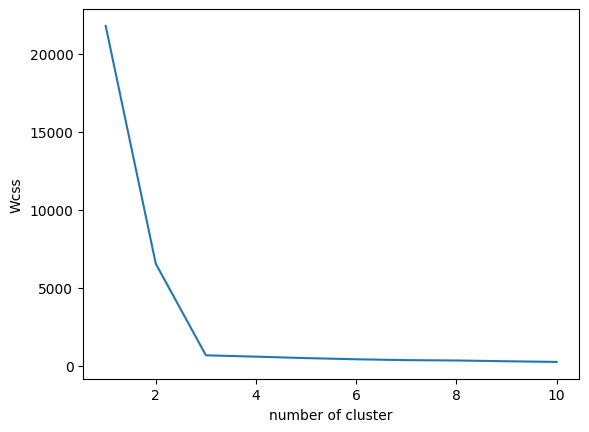

In [ ]:
#Elbow plot
plt.plot(range(1,11),wcss)
plt.xlabel( "number of cluster")
plt.ylabel("Wcss")

In [ ]:
#model Training
kmean = KMeans(n_clusters=3,init="k-means++")

In [ ]:
kmean.fit(X_train)

KMeans(n_clusters=3)

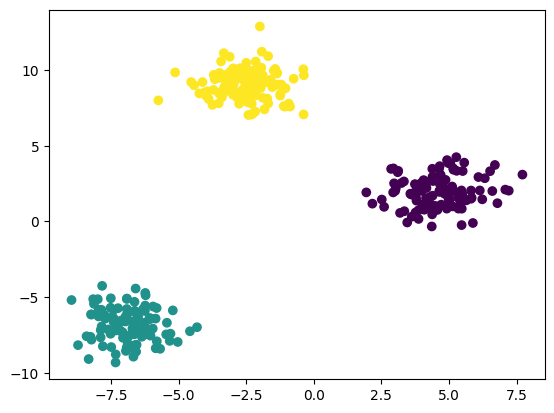

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c = kmean.labels_)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[np.float64(0.6940050741704639),
 np.float64(0.8379573700063556),
 np.float64(0.6689870110439952),
 np.float64(0.4835739743637953),
 np.float64(0.4830917647427972),
 np.float64(0.33092485323047477),
 np.float64(0.3478009026106527),
 np.float64(0.3624386335649821),
 np.float64(0.3494963597995209)]

**Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.**

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(n_samples=1000,centers =4,random_state=42)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean = KMeans(n_clusters=4,init="k-means++")

In [ ]:
kmean.fit(X)

KMeans(n_clusters=4)

In [ ]:
prediction  = kmean.predict(X)

In [ ]:
import matplotlib.pyplot as plt

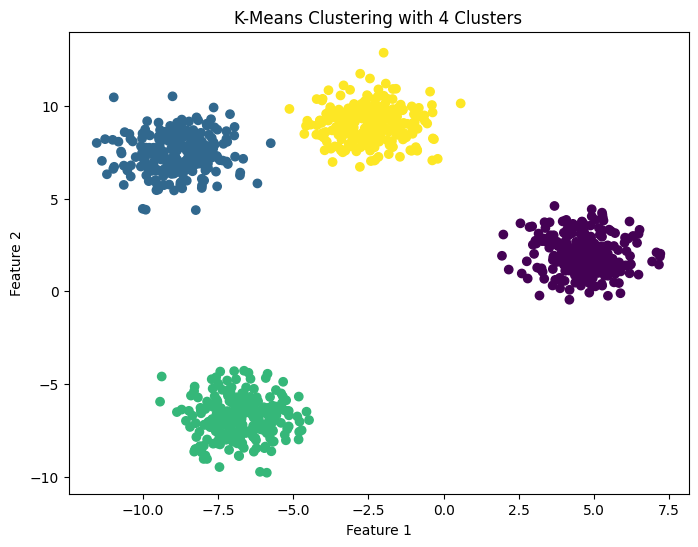

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c = prediction)
plt.title("K-Means Clustering with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).**

In [42]:
from  sklearn.datasets import load_wine

In [43]:
#loading the Wine dataset
Wine  = load_wine()

In [44]:
import pandas as pd

In [45]:
#creating a data frame
df = pd.DataFrame(data= Wine.data,columns=Wine.feature_names)

In [46]:
y = Wine.target

In [47]:
from sklearn.decomposition import PCA

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
#Apply Standarscaler
scaler = StandardScaler()

In [50]:
X_scaled  = scaler.fit_transform(df)

In [51]:
pca = PCA(n_components=2)

In [52]:
X_PCA = pca.fit(X_scaled)

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
dbscan = DBSCAN(eps=0.5)

In [59]:
dbscan.fit(X_scaled)

DBSCAN()

**Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.**

In [105]:
from sklearn.datasets import make_moons

In [106]:
#generate moons shape data
X,  y= make_moons(n_samples=200,noise = 0.1)

In [107]:
import matplotlib.pyplot as plt

In [108]:
X

array([[ 1.95126111e+00,  1.37659421e-01],
       [ 1.86549260e+00, -3.03614371e-02],
       [-7.31731836e-01,  6.91142466e-01],
       [-7.83283649e-01,  5.25130286e-01],
       [ 1.77489276e+00, -1.78941279e-01],
       [ 5.76829213e-01,  7.64083616e-01],
       [ 5.48577731e-02,  3.80253545e-01],
       [ 1.78764565e+00, -1.00320017e-01],
       [ 5.06005286e-02,  1.13204787e+00],
       [ 5.50778778e-01,  8.90955837e-01],
       [ 1.14892557e-01,  1.48357515e-01],
       [ 3.57195727e-01, -4.95840029e-02],
       [ 5.11325718e-01, -4.69264110e-01],
       [ 3.86818866e-01,  8.26729365e-01],
       [-1.85512430e-02,  9.78210422e-01],
       [ 2.61049934e-01, -1.53190931e-01],
       [ 1.95323670e+00, -1.08083072e-01],
       [ 5.70377517e-02,  5.65589040e-01],
       [ 8.79345757e-01, -3.49362296e-04],
       [ 2.30458843e-01,  4.51788037e-02],
       [ 9.24026972e-01,  1.80580851e-01],
       [-4.48418742e-02,  2.48944743e-01],
       [-9.78720082e-01,  3.16381378e-01],
       [ 1.

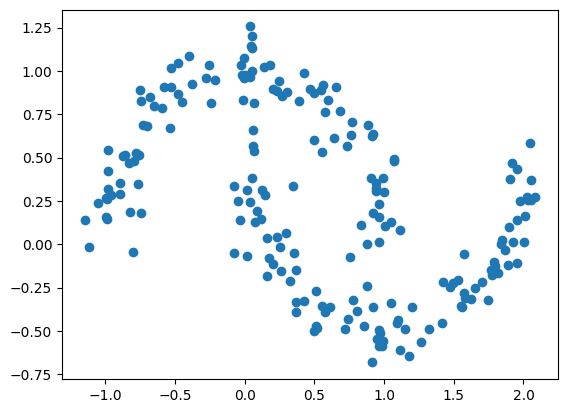

In [109]:
plt.scatter(X[:,0],X[:,1])

In [110]:
# Apply Standard scale
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
X_scaled = scaler.fit_transform(X)

In [113]:
from sklearn.cluster import DBSCAN

In [114]:
dbscan = DBSCAN(eps = 0.5)

In [115]:
dbscan.fit(X_scaled)

DBSCAN()

In [116]:
predication = dbscan.labels_

In [117]:
predication

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

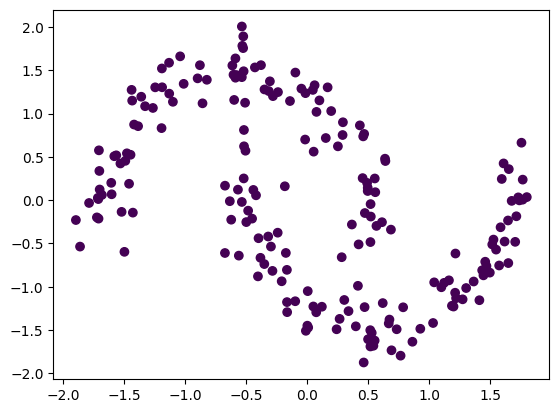

In [119]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = dbscan.labels_)